In [304]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [305]:
DATA_PATH = "/home/matv864/it/AI_work/data/billionaires.csv"
SAVE_DATA_PATH = "/home/matv864/it/AI_work/data/billionaires_{}.csv"

In [306]:
# import kagglehub


# # Download latest version
# path = kagglehub.dataset_download(
#     "nelgiriyewithana/billionaires-statistics-dataset",
# )

# print("Path to dataset files:", path)

In [307]:
df = pd.read_csv(DATA_PATH)

In [308]:
df = df.dropna(thresh=df.shape[1] - 5)
df.shape

(2398, 35)

In [309]:
column = "rank"


In [310]:
column = "finalWorth"


In [311]:
column = "category"
# unique 18

df = df.drop(column, axis=1)

In [312]:
column = "personName"
# don't need

df = df.drop(column, axis=1)

In [313]:
column = "age"
# loss 2%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [314]:
column = "country"
# loss 1%
# unique 78

df = df.drop(column, axis=1)

In [315]:
column = "city"
# loss 3%
# unique 741

df = df.drop(column, axis=1)

In [316]:
column = "source"
# unique 908

df = df.drop(column, axis=1)

In [ ]:
column = "industries"
# unique 18

df = df.drop(column, axis=1)

In [318]:
column = "countryOfCitizenship"
# unique 77

df = df.drop(column, axis=1)

In [319]:
column = "organization"
# very small amount of information 
# loss 88%

df = df.drop(column, axis=1)

In [320]:
column = "selfMade"
# ready in True/False

# yes_no_dict = {
#     True: 1,
#     False: 0
# }

# df[column] = df[column].map(yes_no_dict)


In [321]:
column = "status"
# unique 6

df = df.drop(column, axis=1)

In [322]:
column = "gender"

# df = df.drop(column, axis=1)

In [323]:
column = "birthDate"

def convert_to_date(date: str | None) -> datetime:
    if type(date) is str:
        return datetime.strptime(date, r'%m/%d/%Y %H:%M')
    return date

df[column] = (
    df[column]
    .apply(convert_to_date)
)

mean_timestamp = df[column].dropna().astype('int64').mean()
mean_date = pd.to_datetime(mean_timestamp)

df[column] = df[column].fillna(mean_date)

# df = df.drop(column, axis=1)

In [324]:
column = "lastName"



df = df.drop(column, axis=1)

In [325]:
column = "firstName"

df[column] = df[column].dropna()

df = df.drop(column, axis=1)

In [326]:
column = "title"
# loss 87%

df = df.drop(column, axis=1)

In [327]:
column = "date"
# not interesting


df = df.drop(column, axis=1)

In [328]:
column = "state"
# not interested

df = df.drop(column, axis=1)

In [329]:
column = "residenceStateRegion"
# not interested

df = df.drop(column, axis=1)

In [330]:
column = "birthYear"
# we have birthDate

# df = df.drop(column, axis=1)

In [331]:
column = "birthMonth"
# we have birthDate

# df = df.drop(column, axis=1)

In [332]:
column = "birthDay"
# we have birthDate

# df = df.drop(column, axis=1)

In [333]:
column = "cpi_country"
# loss 7%
# after soft clean 3 nan - <0.001%

print(df[column].isna().sum()/df[column].count())
df[column] = df[column].dropna()

# df = df.drop(column, axis=1)

0.00041718815185648727


In [334]:
column = "cpi_change_country"
# loss 7%
# after soft clean 3 nan - <0.001%

print(df[column].isna().sum()/df[column].count())
df[column] = df[column].dropna()

# df = df.drop(column, axis=1)

0.00041718815185648727


In [335]:
column = "gdp_country"
# loss 6%
# after soft clean 3 nan - 0%

def from_dollars_to_int(string: str) -> int:
    return int(string.replace("$", "").replace(",", ""))

print(df[column].isna().sum()/df[column].count())

df[column] = df[column].apply(from_dollars_to_int)

# df = df.drop(column, axis=1)

0.0


In [336]:
column = "gross_tertiary_education_enrollment"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [337]:
column = "gross_primary_education_enrollment_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [338]:
column = "life_expectancy_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [339]:
column = "tax_revenue_country_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [340]:
column = "total_tax_rate_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())



# df = df.drop(column, axis=1)

0.0


In [341]:
column = "population_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())


# df = df.drop(column, axis=1)

0.0


In [342]:
column = "latitude_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())



# df = df.drop(column, axis=1)

0.0


In [343]:
column = "longitude_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [344]:
df.to_csv(SAVE_DATA_PATH.format(1))

In [ ]:
df = pd.get_dummies(df, columns=["gender"])

                                                rank  finalWorth       age  \
rank                                        1.000000   -0.446311 -0.136961   
finalWorth                                 -0.446311    1.000000  0.061529   
age                                        -0.136961    0.061529  1.000000   
selfMade                                    0.079831   -0.032820 -0.068284   
birthDate                                   0.137720   -0.061793 -0.999776   
birthYear                                   0.138377   -0.061854 -0.999322   
birthMonth                                 -0.029960    0.000193  0.012596   
birthDay                                   -0.040947    0.057705  0.091894   
cpi_country                                 0.079001   -0.044428 -0.001433   
cpi_change_country                         -0.060862    0.033675  0.114149   
gdp_country                                -0.052446    0.037500 -0.066339   
gross_tertiary_education_enrollment        -0.122888    0.064264

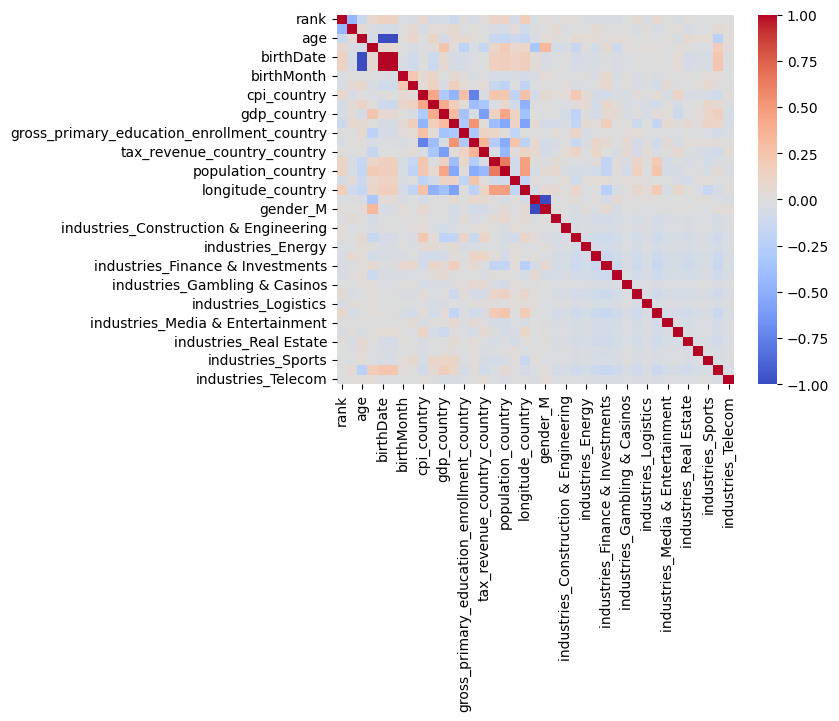

In [346]:
# Compute the correlation matrix of the variables
diamonds_corr_matrix = df.corr()
print(diamonds_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(diamonds_corr_matrix, cmap='coolwarm')

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()